# 프로젝트1: 손수 설계하는 선형회귀, 당뇨병 수치를 맞춰보자!

- 참고자료 : https://yhyun225.tistory.com/11

### 1. 데이터 가져오기

In [1]:
from sklearn.datasets import load_diabetes

diabetes=load_diabetes()

In [2]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### 2. 모델에 입력할 데이터 X 준비하기

In [20]:
X = diabetes.data

In [21]:
X.shape

(442, 10)

### 3. 모델에 입력할 데이터 y 준비하기

In [22]:
y = diabetes.target

In [23]:
y.shape

(442,)

In [24]:
import pandas as pd
df = pd.DataFrame(X, columns = diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [25]:
df["target"] = y
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


### 4. train 데이터와 test 데이터로 분리하기

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

### 5. 모델 준비하기

In [28]:
# W, b 임의의 값으로 지정, 10 개
import numpy as np
W = np.random.rand(10)
b = np.random.rand()

In [29]:
W, b

(array([0.09204345, 0.07558935, 0.00408208, 0.59468365, 0.84007514,
        0.27208284, 0.63957024, 0.71674873, 0.85903917, 0.28172416]),
 0.5479415688732056)

In [30]:
# 예측값 구하는 모델
def model(X, W, b):  
    predictions = 0 
    for i in range(len(W)):
        predictions += X[:, i] * W[i]  # 예를 들어 X 1열에 W 1번 요소 다 곱하기
    predictions += b  # 하나의 벡터로 나옴
    return predictions

### 6. 손실함수 loss 정의하기

In [31]:
# MSE 함수, 정답값과 예측값의 차이를 알아보는 함수
def MSE(a, b):
    mse = ((a - b)**2).mean()
    return mse

In [32]:
# MSE 기반 loss 함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

### 7. 기울기를 구하는 gradient 함수 구현하기

In [33]:
# dW, db 리턴함수
def gradient(X, W, b, y):
    # 가중치 개수
    N = len(W)
    
    y_pred = model(X, W, b)
    
    # X와 y 내적
    dW = 1/N * 2 * X.T.dot(y_pred - y)  
    
    # b 구하기
    db = 2 * (y_pred - y).mean()
    return dW, db

### 8. 하이퍼 파라미터인 학습률 설정하기

In [34]:
# learning rate 설정
LEARNING_RATE = 0.001

### 9. 모델 학습하기

__원본 데이터 그대로 학습__

In [35]:
losses = []

for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print("Iteration %d : Loss %0.4f " %(i, L))

Iteration 100 : Loss 21477.3649 
Iteration 200 : Loss 16024.3180 
Iteration 300 : Loss 12321.1086 
Iteration 400 : Loss 9795.0543 
Iteration 500 : Loss 8061.9659 
Iteration 600 : Loss 6863.9884 
Iteration 700 : Loss 6027.9547 
Iteration 800 : Loss 5437.4796 
Iteration 900 : Loss 5014.2600 
Iteration 1000 : Loss 4705.5427 
Iteration 1100 : Loss 4475.7251 
Iteration 1200 : Loss 4300.7234 
Iteration 1300 : Loss 4164.1978 
Iteration 1400 : Loss 4055.0192 
Iteration 1500 : Loss 3965.5701 
Iteration 1600 : Loss 3890.6041 
Iteration 1700 : Loss 3826.4791 
Iteration 1800 : Loss 3770.6423 
Iteration 1900 : Loss 3721.2832 
Iteration 2000 : Loss 3677.0997 
Iteration 2100 : Loss 3637.1403 
Iteration 2200 : Loss 3600.6969 
Iteration 2300 : Loss 3567.2322 
Iteration 2400 : Loss 3536.3304 
Iteration 2500 : Loss 3507.6628 
Iteration 2600 : Loss 3480.9645 
Iteration 2700 : Loss 3456.0182 
Iteration 2800 : Loss 3432.6424 
Iteration 2900 : Loss 3410.6835 
Iteration 3000 : Loss 3390.0098 


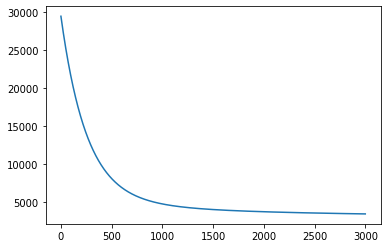

In [36]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.show()

__성별 피쳐 제거__
- 성별이 당뇨병에 큰 영향을 주지 않는것으로 추정해서 제거

In [37]:
df.drop(["sex", "target"], axis = 1, inplace = True)

In [38]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(df.values, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [39]:
W2 = np.random.rand(9)
b2 = np.random.rand()
LEARNING_RATE = 0.001
losses2 = []

for i in range(1, 5001):
    dW2, db2 = gradient(X_train2, W2, b2, y_train2)
    W2 -= LEARNING_RATE * dW2
    b2 -= LEARNING_RATE * db2
    L2 = loss(X_train2, W2, b2, y_train2)
    losses2.append(L2)
    if i % 100 == 0:
        print("Iteration %d : Loss %0.4f " %(i, L2))

Iteration 100 : Loss 21513.4962 
Iteration 200 : Loss 16012.8313 
Iteration 300 : Loss 12276.5410 
Iteration 400 : Loss 9727.7870 
Iteration 500 : Loss 7979.4766 
Iteration 600 : Loss 6771.7091 
Iteration 700 : Loss 5929.8614 
Iteration 800 : Loss 5336.5014 
Iteration 900 : Loss 4912.5652 
Iteration 1000 : Loss 4604.7403 
Iteration 1100 : Loss 4377.0086 
Iteration 1200 : Loss 4204.9748 
Iteration 1300 : Loss 4072.0625 
Iteration 1400 : Loss 3966.9624 
Iteration 1500 : Loss 3881.9186 
Iteration 1600 : Loss 3811.5774 
Iteration 1700 : Loss 3752.2140 
Iteration 1800 : Loss 3701.2113 
Iteration 1900 : Loss 3656.7090 
Iteration 2000 : Loss 3617.3667 
Iteration 2100 : Loss 3582.2034 
Iteration 2200 : Loss 3550.4888 
Iteration 2300 : Loss 3521.6691 
Iteration 2400 : Loss 3495.3162 
Iteration 2500 : Loss 3471.0928 
Iteration 2600 : Loss 3448.7283 
Iteration 2700 : Loss 3428.0018 
Iteration 2800 : Loss 3408.7301 
Iteration 2900 : Loss 3390.7591 
Iteration 3000 : Loss 3373.9577 
Iteration 3100 :

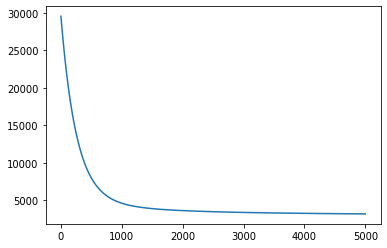

In [40]:
plt.plot(losses2)
plt.show()

### 10. test 데이터에 대한 성능 확인하기

In [41]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

3062.460036586797

__성별 피쳐 제거한 데이터의 MSE__

In [42]:
prediction2 = model(X_test2, W2, b2)
mse2 = loss(X_test2, W2, b2, y_test2)
mse2

2984.598965681273

- 성별을 제거했을 때, 약간 더 좋은 예측값을 얻을 수 있는것으로 보임

### 11. 정답 데이터와 예측한 데이터 시각화하기

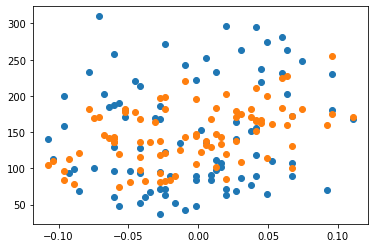

In [43]:
# 원본 데이터
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()

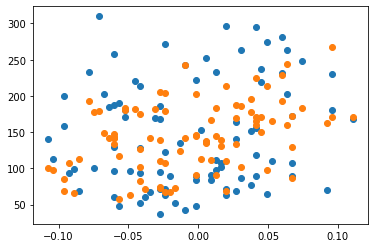

In [44]:
# 성별 제거 데이터
plt.scatter(X_test2[:,0], y_test2)
plt.scatter(X_test2[:,0], prediction2)
plt.show()

### 결론
- 성별 피쳐를 제거해도 예측에 유의미한 차이를 보이지는 않음
- 보다 정밀한 EDA 과정이 필요함

# 회고
- 직접 선형회귀 함수와 손실함수를 만들어보면서 그 원리를 이해하게 되었다. 
- 회귀에 사용될 피쳐를 직접 선택해보면서 어떤 피쳐를 고르는가가 회귀 모델 성능에 어떤 영향을 미치는지 확인했다. 
- 하이퍼 파라미터인 Learning Rate를 직접 조정하고 학습 과정을 확인하면서 learning rate가 어떤역할을 하고 이에 따라 모델이 어떻게 동작하는지 확인하고 이해할 수 있게 되었다.  